# 1 Descriptive Statistics

## 1.0

We load data on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) and store it in an $\texttt{ndarray}$ for you.

In [2]:
# Module for arrays.
import numpy as np
# Module for data frames.
import pandas as pd

# Load stock data as pandas DataFrame.
stocks = pd.read_csv("stocks.csv")
# Display DataFrame.
display(stocks)
# Store stock return variable values in a NumPy array.
ret = stocks["Mkt-RF"].values
# Print the "ret" variable.
print(ret)
# Print the type of the "ret" variable.
print(type(ret))

,Month,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1135,202102,2.78,2.06,7.18,0.00
1136,202103,3.08,-2.37,7.40,0.00
1137,202104,4.93,-3.19,-0.94,0.00
1138,202105,0.29,-0.25,7.08,0.00


[2.96 2.64 0.36 ... 4.93 0.29 2.75]
<class 'numpy.ndarray'>


## 1.1

SciPy and NumPy have functions for computing sample

- mean
- variance
- standard deviation
- skewness
- kurtosis
- quantiles

As an exercise, implement your own functions for these descriptive statistics. The functions should be designed to operate on a one-dimensional $\texttt{ndarray}$. You may use other Scipy and Numpy functions in your implementations.  Apply your functions to the $\texttt{ret}$ data to test them.

In [ ]:
# Sample mean.
def my_mean(arr):
    # Sample size (length of array).
    n = len(arr)
    # Sum of array elements divided by sample size.
    return np.sum(arr) / n

# Unbiased sample variance.
def my_var(arr):
    # Sample size.
    n = len(arr)
    # Array of deviations of array elements from sample mean.
    # Note that "array - scalar" will broadcast the subtraction.
    dev = arr - my_mean(arr)
    # Note the use of Bessel"s correction.
    # Note that "array**2" performs squaring elementwise.
    return np.sum(dev**2) / (n - 1)

# Sample standard deviation derived from unbiased sample variance.
def my_std(arr):
    return np.sqrt(my_var(arr))

# Adjusted Fisher-Pearson coefficient of skewness.
def my_skew(arr):
    # Sample size.
    n = len(arr)
    # Deviations.
    dev = arr - my_mean(arr)
    # Third central sample moment.
    m3 = np.sum(dev**3) / n
    # Second central sample moment.
    m2 = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = np.sqrt(n*(n-1)) / (n-2)
    return adj * (m3 / m2**(3/2))

# Adjusted Fisher coefficient of kurtosis.
def my_kurt(arr):
    # Sample size.
    n = len(arr)
    # Deviations.
    dev = arr - my_mean(arr)
    # Fourth central sample moment.
    m4 = np.sum(dev**4) / n
    # Second central sample moment.
    m2 = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = (n-1) / ((n-2)*(n-3))
    return adj * ((n+1)*(m4 / (m2**2)) - (n-1)*3)

# Implementation of the default method of the NumPy function.
# See the documentation for more detail.
# q: Quantile to compute. Decimal number in [0,1).
def my_quant(arr, q):
    # Sample size.
    n = len(arr)
    # Sort array in place by calling the "sort()" method.
    arr.sort()
    # Indices of points for linear interpolation.
    # Note that "int()" returns the integer part of a decimal number.
    i = int((n-1)*q)
    j = i + 1
    # Fractional part of unrounded index.
    # Note the use of the modulus operator "%."
    frac = (n-1)*q % 1
    # Linear interpolation.
    return arr[i] + (arr[j] - arr[i]) * frac

# List of labels to print.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis", "First Quartile", "Median", "Third Quartile"]
# List of statistics.
value = [my_mean(ret), my_var(ret), my_std(ret), my_skew(ret), my_kurt(ret), my_quant(ret, 0.25), my_quant(ret, 0.50), my_quant(ret, 0.75)]
# Print table.
print("***My Functions***")
for i in range(len(label)):
    # Print results in two columns.
    # "{}" is a placeholder for a string.
    # ":" indicates start of format specification.
    # "<" indicates left alignment.
    # "25" indicates field width of 25 characters.
    print("{:<25} {}".format(label[i], value[i]))

***My Functions***
Mean                      0.68990350877193
Variance                  28.547930719390664
Standard Deviation        5.343026363344155
Skewness                  0.16483421670168233
Kurtosis                  7.641179282025668
First Quartile            -1.97
Median                    1.06
Third Quartile            3.65


## 1.2

Apply the corresponding SciPy or NumPy functions. Do your functions give different results? If so, are your implementations incorrect, or can you adjust some parameters of the SciPy or NumPy functions to give the same results?

In [ ]:
# The point of this exercise:
# There are different definitions of the above statistics.
# Some implementations provide parameters that let you choose versions.

# Import specific functions from SciPy.
from scipy.stats import skew, kurtosis

# List of labels.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis", "First Quartile", "Median", "Third Quartile"]
# List of statistics.
value = [np.mean(ret), np.var(ret), np.std(ret), skew(ret), kurtosis(ret), np.quantile(ret, 0.25), np.quantile(ret, 0.50), np.quantile(ret, 0.75)]
# Print table.
print("***SciPy and NumPy Functions, Default Parameters***")
for i in range(len(label)):
    print("{:<25} {}".format(label[i], value[i]))
    
# Results differ for variance, standard deviation, skewness, and kurtosis.
# This is because the default parameters set the functions to compute alternative versions of the statistics.

# We can adjust the parameters to match our versions of the statistics.
# Note the extra arguments to the functions.
label = ["Variance", "Standard Deviation", "Skewness", "Kurtosis"]
value = [np.var(ret, ddof=1), np.std(ret, ddof=1), skew(ret, bias=False), kurtosis(ret, bias=False)]

# Print table.
print("\n***SciPy and NumPy Functions, Adjusted Parameters***")
for i in range(len(label)):
    print("{:<25} {}".format(label[i], value[i]))

# Results are now within a roundoff error of each other.
# Roundoff error is due to alternative arithmetic implementation.

***SciPy and NumPy Functions, Default Parameters***
Mean                      0.6899035087719294
Variance                  28.522888674899974
Standard Deviation        5.340682416592469
Skewness                  0.1646172502541231
Kurtosis                  7.602447924389525
First Quartile            -1.97
Median                    1.06
Third Quartile            3.65

***SciPy and NumPy Functions, Adjusted Parameters***
Variance                  28.547930719390667
Standard Deviation        5.343026363344155
Skewness                  0.16483421670168288
Kurtosis                  7.641179282025668


## 1.3

The normal distribution is commonly used to model natural and social phenomena. Investigate whether the hypothesis that stock return is normally distributed is plausible as follows:

- Simulate draws from a normal distribution having mean equal to the sample mean of the stock returns and standard deviation equal to the sample standard deviation of the stock returns. Use a random state of 0, and for the number of draws, use the number of stock return observations.
- Compare histograms of the simulated data and the actual stock returns.

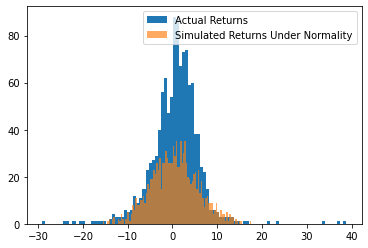

In [ ]:
# Import class for normal distribution from SciPy.
# It is customary to import this under an alias because "norm" is used for vector norms.
from scipy.stats import norm as gaussian
# Import class for plotting.
import matplotlib.pyplot as plt

# Number of stock return observations.
n = len(ret)
# Simulate normal random variates using a method.
# Note specification of random state (seed).
sim = gaussian.rvs(loc=np.mean(ret), scale=np.std(ret), size=n, random_state=0)

# Plot frequency histograms.
plt.hist(ret, bins=100, label="Actual Returns")
# alpha controls transparency.
plt.hist(sim, bins=100, alpha=0.66, label="Simulated Returns Under Normality")
# Display legend.
plt.legend()
# Shows previously specified plot elements.
plt.show()

# The returns exhibit fatter tails in comparison to the simulated normal data.
# This is called "excess kurtosis" or "leptokurtosis."
# It indicates that extreme outcomes are more probable than under a normal distribution.
# Excess kurtosis is a commonly observed feature of asset returns.
# The hypothesis that the historical stock return is normally distributed is implausible based on differing kurtosis.